In [1]:
# IMPORT MODULES
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

### Reflect Tables into SQLAlchemy ORM

In [2]:
# engine = create_engine("sqlite:///Resources/hawaii.sqlite")
engine = create_engine("sqlite:///hawaii.sqlite")

In [3]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [4]:
 # We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [5]:
 # Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [6]:
# Create our session (link) from Python to the DB
session = Session(engine)

### Exploratory Climate Analysis

Text(0, 0.5, 'Precipitation (inches)')

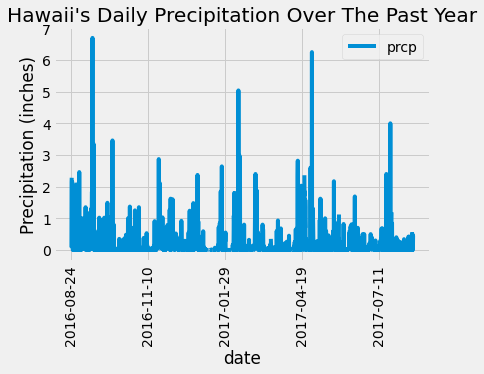

In [40]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
last_twelve = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date > "2016-08-23").order_by(Measurement.date.asc()).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
last_twelve_df = pd.DataFrame(last_twelve)
last_twelve_df.set_index('date',inplace=True)
last_twelve_df = last_twelve_df.sort_index()
# last_twelve_df

# Use Pandas Plotting with Matplotlib to plot the data
# plt.scatter(last_twelve_df.index,last_twelve_df.prcp)
# plt.xlabel("Weight (g)")
# plt.ylabel("Tumor Volume (mm3)")
# plt.title("Average Weight & Tumor Volume for mice treated with Capomulin")
# plt.show()

ax = last_twelve_df.plot(rot=90);
ax.set_title("Hawaii's Daily Precipitation Over The Past Year")
ax.set_ylabel("Precipitation (inches)")

# last_twelve_df.plot.scatter('date','prcp')

In [8]:
# Explore 
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x251ff97d9b0>,
 'station': 'USC00519397',
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1,
 'prcp': 0.08}

In [9]:
# Find dates in the MEASUREMENT table
measurement_dates = session.query(Measurement.date).group_by(Measurement.date).order_by(Measurement.date.desc()).all()
print(measurement_dates)

[('2017-08-23',), ('2017-08-22',), ('2017-08-21',), ('2017-08-20',), ('2017-08-19',), ('2017-08-18',), ('2017-08-17',), ('2017-08-16',), ('2017-08-15',), ('2017-08-14',), ('2017-08-13',), ('2017-08-12',), ('2017-08-11',), ('2017-08-10',), ('2017-08-09',), ('2017-08-08',), ('2017-08-07',), ('2017-08-06',), ('2017-08-05',), ('2017-08-04',), ('2017-08-03',), ('2017-08-02',), ('2017-08-01',), ('2017-07-31',), ('2017-07-30',), ('2017-07-29',), ('2017-07-28',), ('2017-07-27',), ('2017-07-26',), ('2017-07-25',), ('2017-07-24',), ('2017-07-23',), ('2017-07-22',), ('2017-07-21',), ('2017-07-20',), ('2017-07-19',), ('2017-07-18',), ('2017-07-17',), ('2017-07-16',), ('2017-07-15',), ('2017-07-14',), ('2017-07-13',), ('2017-07-12',), ('2017-07-11',), ('2017-07-10',), ('2017-07-09',), ('2017-07-08',), ('2017-07-07',), ('2017-07-06',), ('2017-07-05',), ('2017-07-04',), ('2017-07-03',), ('2017-07-02',), ('2017-07-01',), ('2017-06-30',), ('2017-06-29',), ('2017-06-28',), ('2017-06-27',), ('2017-06-26'

In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data

In [ ]:
# Design a query to show how many stations are available in this dataset?

In [ ]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

In [ ]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram